In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\signalkinetics\anaconda3\envs\CV6869\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\signalkinetics\anaconda3\envs\CV6869\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\signalkinetics\anaconda3\envs\CV6869\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\Users\signalkinetics\anaconda3\envs\CV6869\lib\site-packages\traitlets\config\application.py", line 84

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
# Read the CSV file
df = pd.read_csv('radar/radar_20250424_165731.csv')
df.head()

,node,data,timestamp
0,radar,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2025-04-24 16:01:46.973548
1,radar,"[-52, -171, 8, 339, -142, -160, -329, -395, 5,...",2025-04-24 16:01:47.015566
2,radar,"[-51, -191, -4, 301, -112, -188, -311, -385, -...",2025-04-24 16:01:47.062398
3,radar,"[-56, -166, -26, 342, -160, -158, -315, -406, ...",2025-04-24 16:01:47.108938
4,radar,"[-32, -195, -1, 324, -118, -154, -341, -375, -...",2025-04-24 16:01:47.139449


In [33]:
# read the data column from first row and convert array string to numpy array
data0 = np.array(eval(df.iloc[0, 1]))
data1 = np.array(eval(df.iloc[1, 1]))
data2 = np.array(eval(df.iloc[2, 1]))
dataf = np.array(eval(df.iloc[-1, 1]))
print("Data shape:", data0.shape)
print("data0", data0)
print("data1", data1)
print("data2", data2)
print("dataf", dataf)

Data shape: (2048,)
data0 [   0    0    0 ... -169  180 -209]
data1 [ -52 -171    8 ... -201  181 -222]
data2 [ -51 -191   -4 ... -198  191 -207]
dataf [  0   0   0 ... 449 654 211]


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_6924/3685591345.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


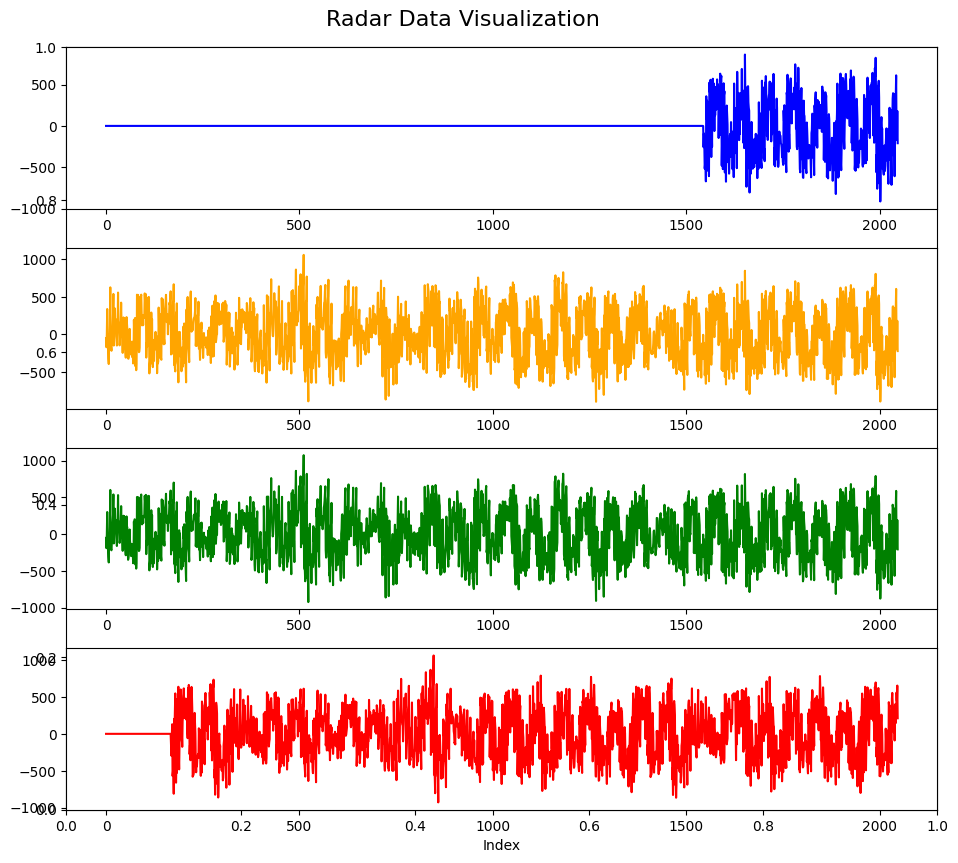

In [34]:
# plot data0, data1, data2, and dataf on subpolots vertically
plt.figure(figsize=(10, 9))
plt.suptitle('Radar Data Visualization', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Index')

plt.subplot(4, 1, 1)
plt.plot(data0, label='Data 0', color='blue')

plt.subplot(4, 1, 2)
plt.plot(data1, label='Data 1', color='orange')

plt.subplot(4, 1, 3)
plt.plot(data2, label='Data 2', color='green')

plt.subplot(4, 1, 4)
plt.plot(dataf, label='Data Final', color='red')

plt.tight_layout()


/var/folders/xg/bxlxvkzj4m578fz9rzkh0z0c0000gp/T/ipykernel_6924/2067781987.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


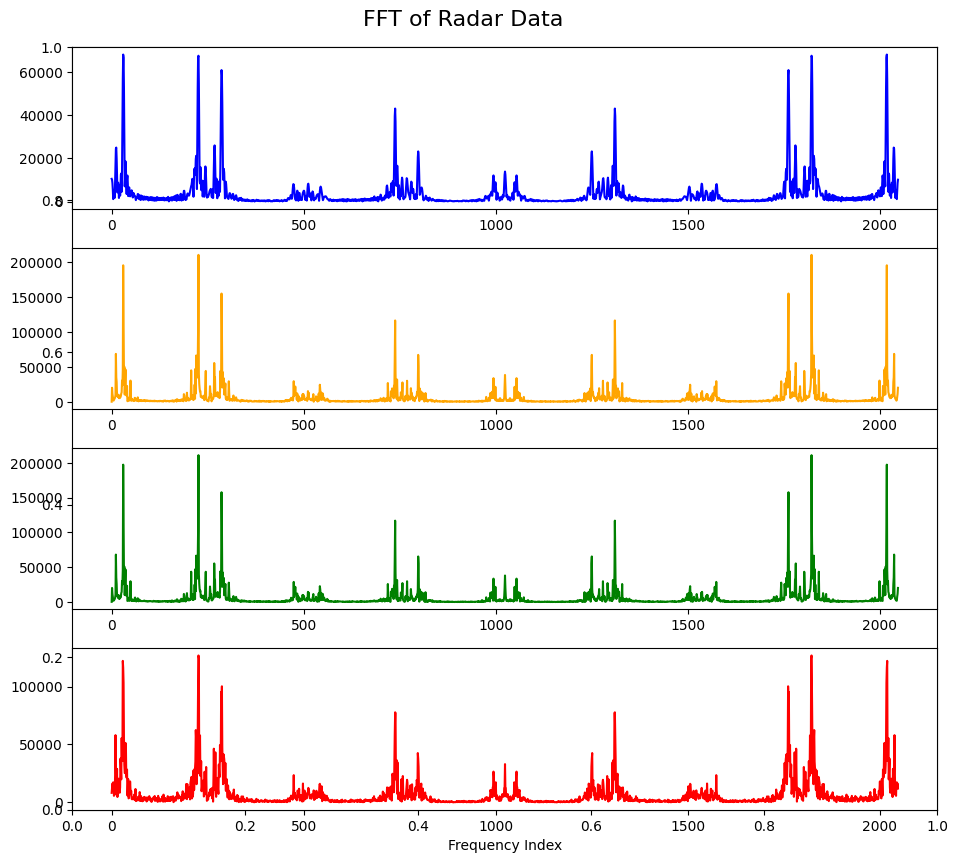

In [35]:
# Do FFT on data0, data1, data2, and dataf
from scipy.fft import fft

fft_data0 = fft(data0)
fft_data1 = fft(data1)
fft_data2 = fft(data2)
fft_dataf = fft(dataf)

# Plot the FFT results
plt.figure(figsize=(10, 9))
plt.suptitle('FFT of Radar Data', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Frequency Index')

plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_data0), label='FFT Data 0', color='blue')
plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_data1), label='FFT Data 1', color='orange')
plt.subplot(4, 1, 3)
plt.plot(np.abs(fft_data2), label='FFT Data 2', color='green')
plt.subplot(4, 1, 4)
plt.plot(np.abs(fft_dataf), label='FFT Data Final', color='red')

plt.tight_layout()